In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,roc_auc_score,auc,roc_curve,precision_score,recall_score
from collections import Counter
from sklearn.model_selection import GridSearchCV

In [2]:
%pwd

'E:\\Data Projects\\2. Stroke Prediction'

In [3]:
data = pd.read_csv("E:\\Data Projects\\2. Stroke Prediction\\model_data.csv",index_col=0)

In [4]:
data.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,private_work,self_employed_work,govt_work,never_work,urban_residence,sex,smoker,former_smoker,never_smoker
0,67.0,0,1,1,228.69,36.600000,1,1,0,0,0,1,1,0,1,0
1,61.0,0,0,1,202.21,29.732039,1,0,1,0,0,0,0,0,0,1
2,80.0,0,1,1,105.92,32.500000,1,1,0,0,0,0,1,0,0,1
3,49.0,0,0,1,171.23,34.400000,1,1,0,0,0,1,0,1,0,0
4,79.0,1,0,1,174.12,24.000000,1,0,1,0,0,0,0,0,0,1


In [5]:
## 1. sampling the data based on 4 samplers (over,under,smote,adasyn)
## 2. train test split
## 3. model fitting (logistic, Random Forest, Kmeans, GuassianNB,SVM)
## 4. checking accuracy for each
## 5. selecting the best model and grid search CV

In [6]:
x = data[['age', 'avg_glucose_level', 'bmi','hypertension', 'heart_disease', 'ever_married', 'private_work', 'self_employed_work', 'govt_work', 'never_work', 'urban_residence', 'sex', 'smoker', 'former_smoker', 'never_smoker']]
y = data["stroke"]

In [7]:
print(data.shape,x.shape,y.shape)

(5109, 16) (5109, 15) (5109,)


In [8]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5104    0
5105    0
5106    0
5107    0
5108    0
Name: stroke, Length: 5109, dtype: int64

In [9]:
# Under Sampling
undersamp = RandomUnderSampler(random_state=40)
x_under,y_under = undersamp.fit_resample(x,y)
print(Counter(y),Counter(y_under))

Counter({0: 4860, 1: 249}) Counter({0: 249, 1: 249})


In [10]:
# Over Sampling
oversamp = RandomOverSampler(random_state=40)
x_over,y_over = oversamp.fit_resample(x,y)
print(Counter(y),Counter(y_over))

Counter({0: 4860, 1: 249}) Counter({1: 4860, 0: 4860})


In [11]:
#SMOTE Sampling
smotesamp = SMOTE(random_state=40)
x_smote,y_smote = smotesamp.fit_resample(x,y)
print(Counter(y),Counter(y_smote))

Counter({0: 4860, 1: 249}) Counter({1: 4860, 0: 4860})


In [12]:
# Adasyn sampling
adasynsamp = ADASYN(random_state=40)
x_ad,y_ad = adasynsamp.fit_resample(x,y)
print(Counter(y),Counter(y_ad))

Counter({0: 4860, 1: 249}) Counter({0: 4860, 1: 4814})


In [13]:
## Train_test_split for all different datasets

#Under sampling splitting
x_under_train,x_under_test,y_under_train,y_under_test = train_test_split(x_under,y_under,random_state=42)
x_over_train,x_over_test,y_over_train,y_over_test = train_test_split(x_over,y_over,random_state=43)
x_smote_train,x_smote_test,y_smote_train,y_smote_test = train_test_split(x_smote,y_smote,random_state=41)
x_ad_train,x_ad_test,y_ad_train,y_ad_test = train_test_split(x_ad,y_ad,random_state=40)

In [49]:
def logregmodel(value1,value2,value3,value4):
    logreg=LogisticRegression()
    logreg.fit(value1,value3)
    y_pred = logreg.predict(value2)
    score = []
    score.append(accuracy_score(value4,y_pred))
    score.append(roc_auc_score(value4,y_pred))
    return score

def rfcclassifier(value1,value2,value3,value4):
    rfc=RandomForestClassifier()
    rfc.fit(value1,value3)
    y_pred = rfc.predict(value2)
    score = []
    score.append(accuracy_score(value4,y_pred))
    score.append(roc_auc_score(value4,y_pred))
    return score

def kmeansmodel(value1,value2,value3,value4):
    kmeans=KMeans()
    kmeans.fit(value1,value3)
    y_pred = kmeans.predict(value2)
    score = []
    score.append(accuracy_score(value4,y_pred))
    score.append(roc_auc_score(value4,y_pred))
    return score

def gaussiannbmodel(value1,value2,value3,value4):
    gausnb=GaussianNB()
    gausnb.fit(value1,value3)
    y_pred = gausnb.predict(value2)
    score = []
    score.append(accuracy_score(value4,y_pred))
    score.append(roc_auc_score(value4,y_pred))
    return score

def svcmodel(value1,value2,value3,value4):
    svc=SVC()
    svc.fit(value1,value3)
    y_pred = svc.predict(value2)
    score = []
    score.append(accuracy_score(value4,y_pred))
    score.append(roc_auc_score(value4,y_pred))
    return score

In [50]:
under_logreg_score = logregmodel(x_under_train,x_under_test,y_under_train,y_under_test)
over_logreg_score = logregmodel(x_over_train,x_over_test,y_over_train,y_over_test)
smote_logreg_score = logregmodel(x_smote_train,x_smote_test,y_smote_train,y_smote_test)
ad_logreg_score = logregmodel(x_ad_train,x_ad_test,y_ad_train,y_ad_test)

In [51]:
under_rfc_score = rfcclassifier(x_under_train,x_under_test,y_under_train,y_under_test)
over_rfc_score = rfcclassifier(x_over_train,x_over_test,y_over_train,y_over_test)
smote_rfc_score = rfcclassifier(x_smote_train,x_smote_test,y_smote_train,y_smote_test)
ad_rfc_score = rfcclassifier(x_ad_train,x_ad_test,y_ad_train,y_ad_test)

In [52]:
under_kmeans_score = kmeansmodel(x_under_train,x_under_test,y_under_train,y_under_test)
over_kmeans_score = kmeansmodel(x_over_train,x_over_test,y_over_train,y_over_test)
smote_kmeans_score = kmeansmodel(x_smote_train,x_smote_test,y_smote_train,y_smote_test)
ad_kmeans_score = kmeansmodel(x_ad_train,x_ad_test,y_ad_train,y_ad_test)

In [53]:
under_gausnb_score = gaussiannbmodel(x_under_train,x_under_test,y_under_train,y_under_test)
over_gausnb_score = gaussiannbmodel(x_over_train,x_over_test,y_over_train,y_over_test)
smote_gausnb_score = gaussiannbmodel(x_smote_train,x_smote_test,y_smote_train,y_smote_test)
ad_gausnb_score = gaussiannbmodel(x_ad_train,x_ad_test,y_ad_train,y_ad_test)

In [54]:
under_svc_score = svcmodel(x_under_train,x_under_test,y_under_train,y_under_test)
over_svc_score = svcmodel(x_over_train,x_over_test,y_over_train,y_over_test)
smote_svc_score = svcmodel(x_smote_train,x_smote_test,y_smote_train,y_smote_test)
ad_svc_score = svcmodel(x_ad_train,x_ad_test,y_ad_train,y_ad_test)

In [55]:
d = {"type":["Under","Over","SMOTE","ADASYN"],"Logistic":[under_logreg_score,over_logreg_score,smote_logreg_score,ad_logreg_score],"Random_Forest":[under_rfc_score,over_rfc_score,smote_rfc_score,ad_rfc_score],"Kmeans":[under_kmeans_score,over_kmeans_score,smote_kmeans_score,ad_kmeans_score],"Gaussian_NB":[under_gausnb_score,over_gausnb_score ,smote_gausnb_score,ad_gausnb_score],"SVC":[under_svc_score,over_svc_score,smote_svc_score,ad_svc_score]}
scores = pd.DataFrame(data=d)

In [56]:
scores

,type,Logistic,Random_Forest,Kmeans,Gaussian_NB,SVC
0,Under,"[0.776, 0.7743340163934426]","[0.736, 0.7352715163934427]","[0.232, 0.578125]","[0.712, 0.7049180327868853]","[0.72, 0.718109631147541]"
1,Over,"[0.7880658436213992, 0.7887083889773094]","[0.9893004115226337, 0.9894566098945661]","[0.1345679012345679, 0.39215401304017006]","[0.6901234567901234, 0.6940861887077792]","[0.7670781893004115, 0.767612461811463]"
2,SMOTE,"[0.8897119341563786, 0.8897125720026474]","[0.9489711934156378, 0.948985239414942]","[0.08683127572016461, 0.4791113570945174]","[0.7613168724279835, 0.7625692590442371]","[0.7592592592592593, 0.7596037966048419]"
3,ADASYN,"[0.8792889623811493, 0.879326232262704]","[0.9627945431996693, 0.9627942316447441]","[0.14427449359239355, 0.3310980136416024]","[0.7602315006200909, 0.7597055256829346]","[0.7759404712691195, 0.7757639393032092]"


## Till now Random Forest with Over sampling and Random Forest with Adasyn sampling has performed the best

In [23]:
## Confusion Matrix and ROC AUC curve for both the Models

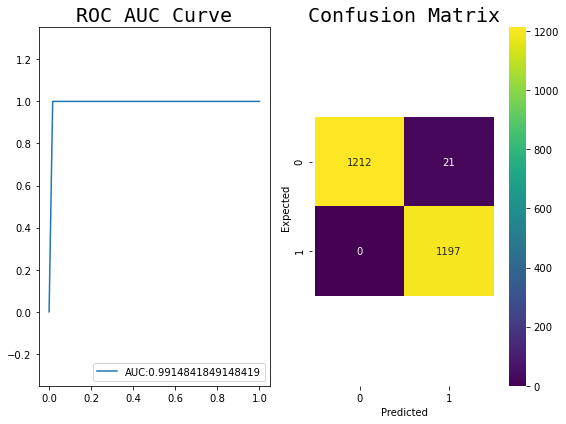

In [57]:
## For Over Sampling
rfc = RandomForestClassifier()
rfc.fit(x_over_train,y_over_train)
y_over_pred = rfc.predict(x_over_test)
conf = confusion_matrix(y_over_test,y_over_pred)
fpr,tpr,_ = roc_curve(y_over_test,y_over_pred)
fig,axs = plt.subplots(nrows = 1,ncols = 2,figsize=(8,6))
axs[0].plot(fpr,tpr,label="AUC:"+str(roc_auc_score(y_over_test,y_over_pred)))
sns.heatmap(pd.DataFrame(conf),annot=True,cmap="viridis",fmt="d",ax=axs[1])
axs[0].legend(loc=4)
axs[1].set_ylabel("Expected")
axs[1].set_xlabel("Predicted")
axs[0].set_title("ROC AUC Curve",fontfamily = "monospace",fontsize = "20",fontweight="2")
axs[1].set_title("Confusion Matrix",fontfamily = "monospace",fontsize = "20",fontweight="2")
axs[0].axis("equal")
axs[1].axis("equal")
plt.tight_layout()
plt.show()


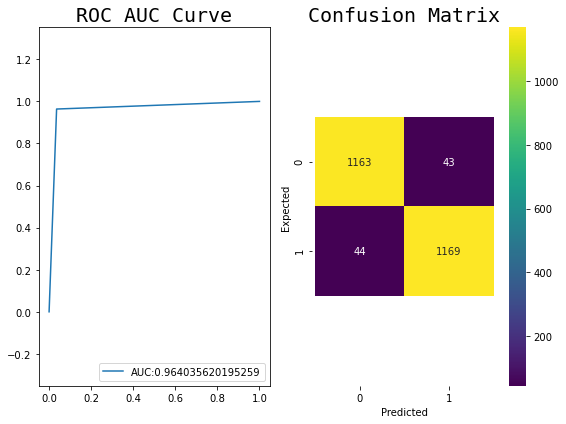

In [36]:
## For Adasyn Sampling
rfc = RandomForestClassifier()
rfc.fit(x_ad_train,y_ad_train)
y_ad_pred = rfc.predict(x_ad_test)
conf = confusion_matrix(y_ad_test,y_ad_pred)
fpr,tpr,_ = roc_curve(y_ad_test,y_ad_pred)
fig,axs = plt.subplots(nrows = 1,ncols = 2,figsize=(8,6))
axs[0].plot(fpr,tpr,label="AUC:"+str(roc_auc_score(y_ad_test,y_ad_pred)))
sns.heatmap(pd.DataFrame(conf),annot=True,cmap="viridis",fmt="d",ax=axs[1])
axs[0].legend(loc=4)
axs[1].set_ylabel("Expected")
axs[1].set_xlabel("Predicted")
axs[0].set_title("ROC AUC Curve",fontfamily = "monospace",fontsize = "20",fontweight="2")
axs[1].set_title("Confusion Matrix",fontfamily = "monospace",fontsize = "20",fontweight="2")
axs[0].axis("equal")
axs[1].axis("equal")
plt.tight_layout()
plt.show()


In [59]:
## Checking the best paramters for the model

In [63]:
params = {"criterion":["gini", "entropy"],"max_features":["auto", "sqrt", "log2"],"class_weight":["balanced", "balanced_subsample"]}
grid_tree = GridSearchCV(RandomForestClassifier(),params)
grid_tree.fit(x_over_train,y_over_train)
best = grid_tree.best_estimator_

In [64]:
best

RandomForestClassifier(class_weight='balanced', max_features='log2')

In [74]:
## The most accurate model till now [Random Forest With Over Sampled Data]

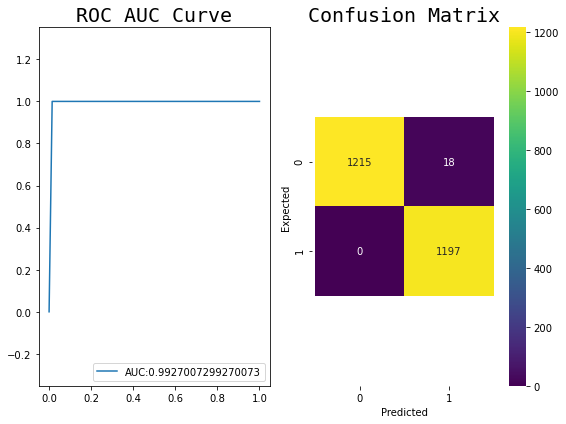

In [69]:
## For Over Sampling
rfc = RandomForestClassifier(class_weight='balanced', max_features='log2',criterion="gini")
rfc.fit(x_over_train,y_over_train)
y_over_pred = rfc.predict(x_over_test)
conf = confusion_matrix(y_over_test,y_over_pred)
fpr,tpr,_ = roc_curve(y_over_test,y_over_pred)
fig,axs = plt.subplots(nrows = 1,ncols = 2,figsize=(8,6))
axs[0].plot(fpr,tpr,label="AUC:"+str(roc_auc_score(y_over_test,y_over_pred)))
sns.heatmap(pd.DataFrame(conf),annot=True,cmap="viridis",fmt="d",ax=axs[1])
axs[0].legend(loc=4)
axs[1].set_ylabel("Expected")
axs[1].set_xlabel("Predicted")
axs[0].set_title("ROC AUC Curve",fontfamily = "monospace",fontsize = "20",fontweight="2")
axs[1].set_title("Confusion Matrix",fontfamily = "monospace",fontsize = "20",fontweight="2")
axs[0].axis("equal")
axs[1].axis("equal")
plt.tight_layout()
plt.show()


### thereofore getting the Random Forest Model best accuracy with Over Sampled Data with over 99% accuracy and no false negatives which is also the most important criteria